# Complex exercise
In this complex exercise we will setup a workflow for multiple processing images in a folder. We will measure properties of the segmented nuclei and stored them in one big table.

If you have any questions and we are not around, feel free to open a thread on [image.sc](https://image.sc)

In [1]:
import napari
import pandas as pd
from skimage.io import imread
from napari_simpleitk_image_processing import label_statistics
import os
import seaborn
import matplotlib.pyplot as plt

In [2]:
data_path = "../../data/BBBC007_batch/"

Load an image from the specified folder and open it in napari.

In [3]:
viewer = napari.Viewer()

image = imread("../../data/BBBC007_batch/17P1_POS0013_D_1UL.tif")

viewer.add_image(image)

C:\Miniconda\envs\devbio-napari-env\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'image' at 0x296fbec74f0>

## Image segmentation
Set up an image segmentation workflow for this image to segment nuclei. Do this using the napari-assistant and export a notebook. Copy paste the code from this notebook into this function:

In [4]:
def segment_image(image):
    import pyclesperanto_prototype as cle 
    
    label_image = cle.voronoi_otsu_labeling(image)
    
    return label_image

In [5]:
test_label_image = segment_image(image)
test_label_image

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

## Feature extraction
Use the following function body to program a routine that takes the image, a corresponding label image and retrieve measurements. You may for example use the function `label_statistics` from `napari_simpleitk_image_processing`. Make sure your function creates a pandas DataFrame.

In [6]:
def analyze_image(image, label_image):
    statistics = label_statistics(image, label_image, size=True, shape=True, intensity=True)

    return pd.DataFrame(statistics)

In [7]:
analyze_image(image, test_label_image)

,label,maximum,mean,median,minimum,sigma,sum,variance,elongation,feret_diameter,flatness,roundness,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border
0,1,233.0,100.089552,99.722656,33.0,41.117595,33530.0,1690.656627,1.260740,25.612497,1.260740,0.934765,18.393516,23.189435,64.882464,10.326365,335,20
1,2,208.0,98.810714,94.761719,32.0,40.788332,27667.0,1663.688057,1.128676,19.723083,1.128676,1.000648,17.772533,20.059440,59.317651,9.440697,280,0
2,3,162.0,93.447368,95.753906,34.0,31.833292,21306.0,1013.358451,1.255614,18.601075,1.255614,0.997034,15.205280,19.091962,53.526932,8.519076,228,0
3,4,165.0,89.504000,90.792969,32.0,27.832437,22376.0,774.644562,1.234672,19.723083,1.234672,0.990321,16.056437,19.824441,56.049912,8.920621,250,9
4,5,194.0,97.106227,95.753906,33.0,34.742430,26510.0,1207.036468,1.088491,19.209373,1.088491,0.991910,17.869976,19.451307,58.571488,9.321942,273,0
5,6,255.0,119.223301,113.613281,23.0,63.206889,24560.0,3995.110869,1.196578,17.088007,1.196578,0.993058,14.805332,17.715736,50.878997,8.097644,206,0
6,7,177.0,100.131206,101.707031,29.0,36.379482,28237.0,1323.466710,1.302883,21.400935,1.302883,0.985746,16.600718,21.628797,59.529123,9.474354,282,0
7,8,216.0,99.171717,95.753906,34.0,38.378636,29454.0,1472.919738,1.013538,19.723083,1.013538,1.002404,19.315824,19.577324,61.091833,9.723067,297,0
8,9,233.0,94.299790,90.792969,33.0,38.443567,44981.0,1477.907836,1.652517,30.886890,1.652517,0.937000,19.170845,31.680150,77.421953,12.322086,477,0
9,10,168.0,89.656827,92.777344,29.0,31.367303,24297.0,983.907722,1.071439,19.924859,1.071439,0.967856,17.945516,19.227528,58.356546,9.287733,271,0


## Batch procesing
Use the following for-loop to iterate through the folder, segment all images, analyse the images, create data frames and concatenate all results in one table.

In [8]:
results = pd.DataFrame()

for file_name in os.listdir(data_path):
    if file_name.endswith('.tif'):
        file_path = os.path.join(data_path, file_name)
        
        # load image
        image = imread(file_path)
        
        # segment image
        label_image = segment_image(image)
        
        # feature extraction
        table = analyze_image(image, label_image)

        # save from which image the measurements were derived from
        table['file_name'] = file_name
        
        # collect results
        results = pd.concat([results, table])

results

,label,maximum,mean,median,minimum,sigma,sum,variance,elongation,feret_diameter,flatness,roundness,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,file_name
0,1,233.0,100.089552,99.722656,33.0,41.117595,33530.0,1690.656627,1.260740,25.612497,1.260740,0.934765,18.393516,23.189435,64.882464,10.326365,335,20,17P1_POS0013_D_1UL.tif
1,2,208.0,98.810714,94.761719,32.0,40.788332,27667.0,1663.688057,1.128676,19.723083,1.128676,1.000648,17.772533,20.059440,59.317651,9.440697,280,0,17P1_POS0013_D_1UL.tif
2,3,162.0,93.447368,95.753906,34.0,31.833292,21306.0,1013.358451,1.255614,18.601075,1.255614,0.997034,15.205280,19.091962,53.526932,8.519076,228,0,17P1_POS0013_D_1UL.tif
3,4,165.0,89.504000,90.792969,32.0,27.832437,22376.0,774.644562,1.234672,19.723083,1.234672,0.990321,16.056437,19.824441,56.049912,8.920621,250,9,17P1_POS0013_D_1UL.tif
4,5,194.0,97.106227,95.753906,33.0,34.742430,26510.0,1207.036468,1.088491,19.209373,1.088491,0.991910,17.869976,19.451307,58.571488,9.321942,273,0,17P1_POS0013_D_1UL.tif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,43,141.0,92.400802,88.808594,60.0,19.982313,46108.0,399.292851,1.376662,30.364453,1.376662,0.938361,21.482838,29.574608,79.187240,12.603041,499,14,AS_09125_040701150004_A02f00d0.tif
43,44,145.0,96.619883,92.777344,61.0,20.819894,33044.0,433.467991,1.298369,24.698178,1.298369,0.921829,18.313401,23.777556,65.556836,10.433695,342,10,AS_09125_040701150004_A02f00d0.tif
44,45,160.0,97.980501,91.785156,56.0,25.582863,35175.0,654.482859,1.332835,26.076810,1.332835,0.944463,18.518856,24.682572,67.166413,10.689867,359,4,AS_09125_040701150004_A02f00d0.tif
45,46,248.0,173.354978,171.160156,93.0,37.667937,40045.0,1418.873442,1.891112,25.942244,1.891112,0.842473,12.471033,23.584120,53.877933,8.574939,231,20,AS_09125_040701150004_A02f00d0.tif


Save the resulting measurements to disk.

In [9]:
results.to_csv("../../data/BBBC007_measurements.csv")

## Plotting
Extract area measurements from two different images from the table above and draw a box plot.

<AxesSubplot:xlabel='number_of_pixels', ylabel='file_name'>

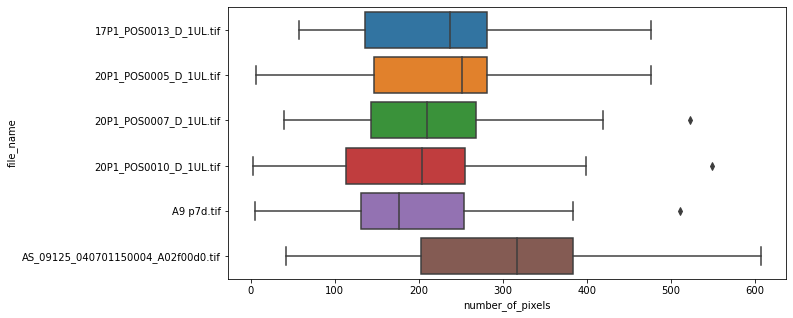

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
seaborn.boxplot(data=results, x="number_of_pixels", y="file_name", ax=ax)